In [46]:
import numpy as np
import random
# np.random.seed(20)
# random.seed(20)
import math
import matplotlib.pyplot as  plt


In [47]:

def get_card():
    # card = random.choice(range(1,14))
    # card = min(card, 10)
    # if card == 1:
    #     card = 11
    card = random.choices(range(2, 12), weights=[1 / 13] * 8 + [4 / 13] + [1 / 13])[0]
    return card


In [48]:


def play_1turn(player_sum,dealer_card1):
    global state_value_pair
    player_hist_state = []
    # action = policy[player_sum - 11, dealer_card1 - 2]
    # state = (player_sum, dealer_card1, action)
    # player_hist_state = [state]
    #
    # if player_sum == 21:
    #     action = ACTION_STICK
    # while action:
    #     card = get_card()
    #     player_sum += card
    #     if player_sum > 21:
    #         break
    #     state = (player_sum,dealer_card1,action)
    #     player_hist_state.append(state)
    #     action = policy[player_sum - 11, dealer_card1 - 2]

    while True:
        action = policy[player_sum - 11,dealer_card1 - 2]
        state = (player_sum,dealer_card1,action)
        player_hist_state.append(state)

        if not action:
            break
        card = get_card()
        player_sum += card

        if player_sum > 21:
            return state, -1, player_hist_state


    dealer_card2 = get_card()
    dealer_sum = dealer_card1 + dealer_card2

    while dealer_sum < 18:
        card = get_card()
        dealer_sum += card

    if player_sum > 21:
        return state,-1,player_hist_state
    if dealer_sum == player_sum:
        reward = 0
    # elif (dealer_sum > 21) or (player_sum > dealer_sum):
    elif dealer_sum > 21 or player_sum > dealer_sum:
        reward = 1
    elif player_sum < dealer_sum:
        reward = -1
    return state,reward,player_hist_state



In [49]:
gamma = 1
policy = np.zeros((11,10))
state_action_value = np.zeros((11,10,2))
Return = {}
state_value_pair = np.zeros((11,10,2))
ACTION_STICK = int(0)
ACTION_HIT = int(1)
EPISODE = 1000000


for i in range(11):
    for j in range(10):
        policy[i, j] = random.choice([ACTION_HIT,ACTION_STICK])

c = 2
from tqdm import tqdm
for _ in tqdm(range(1,EPISODE+1)):
    player_sum = random.choice(range(11, 22))
    dealer_card1 = get_card()
    # dealer_card1 = np.random.choice(range(2, 12))
    cur_state, cur_reward,player_trajectory = play_1turn(player_sum, dealer_card1)

    G = 0
    for ix in range(len(player_trajectory)-1,-1,-1):
        his_state = player_trajectory[ix]
        if his_state == cur_state:
            reward = cur_reward
        else:
            reward = 0
        G = gamma * G + reward
        if his_state in player_trajectory[:ix]:
            continue
        player_sum, dealer_card1, action = his_state
        Return.setdefault(his_state,[]).append(G)
        state_value_pair[player_sum - 11,dealer_card1 - 2,int(action)] += 1
        state_action_value[(player_sum - 11),dealer_card1 - 2,int(action)] = sum(Return[his_state])/len(Return[his_state])
        Q = state_action_value[(player_sum - 11),dealer_card1 - 2,int(action)]
        policy[player_sum - 11, dealer_card1 - 2] = np.argmax(state_action_value[(player_sum - 11),dealer_card1 - 2,:] + np.array(\
            [c * math.sqrt(math.log(_) / state_value_pair[(player_sum - 11, dealer_card1 - 2, a)]) for a in (0, 1)]))
        # epsilon = np.random.random()
        # if epsilon > 0.1:
        #     policy[player_sum - 11,dealer_card1 - 2] = np.argmax(Q + np.array([c * math.sqrt(math.log(_)/state_value_pair[(player_sum - 12,dealer_card1 - 1,a)]) for a in (0,1)]))
        # else:
        #     policy[player_sum - 11,dealer_card1 - 2] = np.random.choice(range(0,1))
        #


  0%|          | 0/1000000 [00:00<?, ?it/s]<ipython-input-49-3bd6121abdfd>:39: RuntimeWarning: invalid value encountered in double_scalars
  [c * math.sqrt(math.log(_) / state_value_pair[(player_sum - 11, dealer_card1 - 2, a)]) for a in (0, 1)]))
<ipython-input-49-3bd6121abdfd>:39: RuntimeWarning: divide by zero encountered in double_scalars
  [c * math.sqrt(math.log(_) / state_value_pair[(player_sum - 11, dealer_card1 - 2, a)]) for a in (0, 1)]))
100%|██████████| 1000000/1000000 [01:51<00:00, 8967.31it/s]


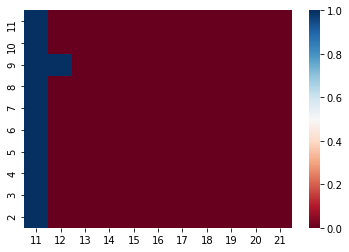

In [51]:
import pandas as pd
policy_df = pd.DataFrame(policy.T,columns=[i for i in  range(11, 22)],index=[i for i in range(2,12)])
import seaborn as sns
ax = sns.heatmap(policy_df, cmap='RdBu')
ax.invert_yaxis()
plt.savefig('UCB.png')
plt.show()

